# Workshop 8: Plucking Strings

In [1]:
import scipy         # Another numerical library
from scipy import integrate

import matplotlib    # Library used for plotting
import numpy as np   # Numerical library
import matplotlib.pyplot as plt # Plot commands
import time

# Define some colors using the RGB format

CF_red = (204/255, 121/255, 167/255)
CF_vermillion = (213/255, 94/255, 0)
CF_orange = (230/255, 159/255, 0)
CF_yellow = (240/255, 228/255, 66/255)
CF_green = (0, 158/255, 115/255)
CF_sky = (86/255, 180/255, 233/255)
CF_blue = (0, 114/255, 178/255)
CF_black = (0, 0, 0)

### Plucking Strings

As you might have already learned (if not, don't worry), the equation of a vibrating string stretched along the $x$ direction is

$$
\frac{\partial^2 y}{\partial x^2} = \frac{\rho}{T}\frac{\partial^2 y}{\partial t^2}\,,
$$

where $T$ is the tension of the string, $\rho$ is the linear density, and $y\left(x,t\right)$ is the transverse displacement of the string segment.

Using the time Fourier transform alows us to recast the string equation into the following form

$$
\frac{d^2 \hat{y}\left(x\right)}{dx^2} = -\omega^2\frac{\rho}{T}\hat{y}\left(x\right)\,,
$$

where $\omega$ is the vibration frequency. You can think of $\hat{y}\left(x\right)$ as the amplitude of the string vibration at some $x$ for a given $\omega$.

Let us now take a string of length $L$ and linear density $\rho$. We stretch it until it has tension $T$ and then fix its endpoints (it's a string, after all). This means that $\hat{y}\left(0\right) = \hat{y}\left(L\right) = 0$. Importantly, there is *NO* reason to expect this to be true for a general case of the string equation! This means that there should be some special values of $\omega$ that allow this to hold.

Consider a string with $\rho = 1.14\times10^{-3}$ kg/m and set the tension to $72$ N. Set $L = 0.64$ m. Let us see what $\omega$'s satisfy the equation.

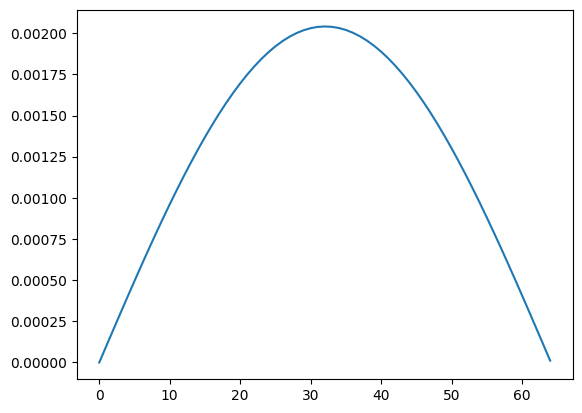

In [61]:
rho = 1.14e-3
tension = 72
L = 0.64
omega = 1 * 196 * 2 * np.pi
# omega = 1 * np.pi / L * np.sqrt(tension / rho)

t_min = 0
t_max = 0.64
epsilon = 0.01
init = np.array([0, 0.01])

def derivative(t, state):
    position, velocity = state
    next_velocity = -(omega ** 2 * rho / tension) * position
    return np.array([velocity, next_velocity])

solution = integrate.solve_ivp(derivative, [t_min, t_max], init, max_step = epsilon)
p, v = solution.y

fig, ax = plt.subplots(1, 1)
ax.plot(p)

Sometimes you don't want to waste your time looking for solutions by hand. Is it possible to speed up the process a bit?

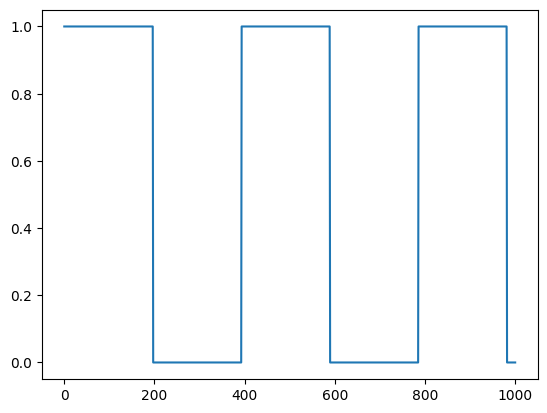

In [57]:
multipliers = np.linspace(0, 1000, 1000)
final_positions = []

for multiplier in multipliers:
    omega = multiplier * 2 * np.pi

    def derivative(t, state):
        position, velocity = state
        next_velocity = -(omega ** 2 * rho / tension) * position
        return np.array([velocity, next_velocity])

    solution = integrate.solve_ivp(derivative, [t_min, t_max], init, max_step = epsilon)
    p, v = solution.y
    final_positions.append((p[-1] > 0))

fig, ax = plt.subplots(1, 1)
ax.plot(multipliers, final_positions)